In [109]:
from pathlib import Path
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import hvplot.pandas
from scipy.stats import linregress

In [110]:
zillow_path = Path("Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zip = "RegionName"
zillow_df = pd.read_csv(zillow_path, dtype={zip:str})
zillow_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,208752.177188,...,468400.012962,469600.790271,471587.869725,474687.471351,477460.027392,479919.299106,481726.908022,482958.479293,483644.390919,484254.484150
1,61148,2,08701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,133799.965954,...,517054.419786,521100.063176,526320.736228,532105.809020,538056.023382,543798.549494,549960.546654,557112.585902,563739.635747,568385.787815
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,102327.332899,...,274575.011824,273391.851083,272916.706411,273291.932508,274045.370378,274933.235990,275461.772882,275451.663963,275219.130604,274931.001539
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,147672.475058,...,480340.864596,473730.902787,466644.010241,461261.507623,459443.414913,459437.482269,458881.548977,456860.171677,453514.767036,449239.710048
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,100957.722364,...,267553.019024,266769.398609,266628.259422,267219.988459,268054.762069,268918.974834,269342.669492,269333.119699,268917.017812,268499.368493


In [111]:
nj_df = zillow_df.loc[zillow_df["State"]=="NJ"]
nj_df.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31
1,61148,2,08701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,133799.965954,...,517054.419786,521100.063176,526320.736228,532105.809020,538056.023382,543798.549494,549960.546654,557112.585902,563739.635747,568385.787815
209,60565,215,07055,zip,NJ,NJ,Passaic,"New York-Newark-Jersey City, NY-NJ-PA",Passaic County,112257.216787,...,434515.584285,438302.873564,443556.388111,448065.465094,450674.818598,451572.325846,452642.300974,454584.729097,457385.725657,460060.463208
218,60642,224,07305,zip,NJ,NJ,Jersey City,"New York-Newark-Jersey City, NY-NJ-PA",Hudson County,155565.081912,...,452519.058390,453824.390647,456646.018622,459021.235458,462018.932069,464900.871530,467901.468729,470251.189218,472032.532734,473196.414613
263,60594,269,07087,zip,NJ,NJ,Union City,"New York-Newark-Jersey City, NY-NJ-PA",Hudson County,90766.359313,...,445259.657238,447288.497272,451733.111089,455802.885936,458105.447499,459328.697150,460471.564590,462596.991564,465896.827481,471667.587630
337,61169,344,08753,zip,NJ,NJ,Toms River,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,128491.913171,...,436283.234154,437756.598019,440522.020782,444103.558338,448297.681818,451976.275057,455271.357058,458529.076749,461728.978439,465068.322323


In [30]:
nj_2020_df = nj_df[["RegionID","State", "City", "CountyName","RegionName", "2019-09-30","2020-09-30","2021-09-30"]]
nj_2020_df= nj_2020_df.astype({"RegionName":str},errors='raise')
nj_2020_df=nj_2020_df.rename(columns={"RegionName":"Zip Code"})
len(nj_2020_df["Zip Code"].unique())

547

In [31]:
great_path = Path("greatschools2exl.xlsx")
greatDf = pd.read_excel(great_path, dtype=str)
greatDf = greatDf.dropna(how="any")
greatDf.head()

,Unnamed: 0,School,Rating,Rating scale,Address,Zip Code,Type,Grades,Total Students Enrolled,PercentLowIncome,Ethnicity,Students per teacher,District,URL
1,1,A C Mac Kinnon Middle School,6,Average,137 East Central Avenue,07885,public,6-8,267,54%,"[{'label': 'Low-income', 'rating': 5, 'percent...",8,Wharton Borough Board Of Education School Dist...,/new-jersey/wharton/2215-A-C-Mac-Kinnon-Middle...
2,2,A E Burling Elementary School,9,Above average,3600 HARRIS AVENUE,08105,public,"PK, K-3",108,60%,"[{'label': 'Low-income', 'percentage': 60}, {'...",14,Pennsauken Township Board Of Education School ...,/new-jersey/pennsauken-township/4564-A-E--Burl...
3,3,A Hamilton Preparatory Academy,6,Average,310 Cherry Street,07208,public,9-12,1000,73%,"[{'label': 'Low-income', 'percentage': 73}, {'...",16,Elizabeth Public School District,/new-jersey/elizabeth/7069-A-Hamilton-Preparat...
4,4,A. Chester Redshaw Elementary School,2,Below average,216 Livingston Avenue,08901,public,"PK, K-5",824,93%,"[{'label': 'Low-income', 'percentage': 93}, {'...",12,New Brunswick Public School District,/new-jersey/new-brunswick/1296-A.-Chester-Reds...
5,5,A. Russell Knight Elementary School,8,Above average,140 Old Carriage Road,08034,public,K-5,394,6%,"[{'label': 'Low-income', 'percentage': 6}, {'l...",12,Cherry Hill Township School District,/new-jersey/cherry-hill/295-A.-Russell-Knight-...


In [32]:
great_path = Path("Schooldata.xlsx")
greatDf = pd.read_excel(great_path)
greatDf = greatDf[["Rating", "Zip Code", "Total Students Enrolled", "Students per teacher", "PercentLowIncome"]]
greatDf = greatDf.astype({"Zip Code":str}, errors="raise")
greatDf["Zip Code"] = [("0"+row) for row in greatDf["Zip Code"]]
greatDf.head()
#great_group_df = greatDf.groupby("Zip Code")
#great_group_df["Rating"].mean()

,Rating,Zip Code,Total Students Enrolled,Students per teacher,PercentLowIncome
0,10,07928,1315,13,0.02
1,10,07039,453,12,0.01
2,10,07039,433,12,0.01
3,10,07601,1118,12,0.03
4,10,07940,271,11,0.02


In [33]:
mergeDf = pd.merge(nj_2020_df,greatDf,right_on="Zip Code",left_on="Zip Code", how="inner")
mergeDf

,RegionID,State,City,CountyName,Zip Code,2019-09-30,2020-09-30,2021-09-30,Rating,Total Students Enrolled,Students per teacher,PercentLowIncome
0,61148,NJ,Lakewood,Ocean County,08701,3.228296e+05,3.336812e+05,4.029012e+05,7,451,"[{'label': 'Low-income', 'rating': 4, 'percent...",11.00
1,61148,NJ,Lakewood,Ocean County,08701,3.228296e+05,3.336812e+05,4.029012e+05,7,425,"[{'label': 'Low-income', 'rating': 4, 'percent...",9.00
2,61148,NJ,Lakewood,Ocean County,08701,3.228296e+05,3.336812e+05,4.029012e+05,7,1284,"[{'label': 'Low-income', 'percentage': 95}, {'...",15.00
3,61148,NJ,Lakewood,Ocean County,08701,3.228296e+05,3.336812e+05,4.029012e+05,6,652,"[{'label': 'Low-income', 'percentage': 93}, {'...",11.00
4,60565,NJ,Passaic,Passaic County,07055,3.095983e+05,3.361013e+05,3.926228e+05,7,884,"[{'label': 'Low-income', 'rating': 6, 'percent...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1275,60722,NJ,Alpine,Bergen County,07620,2.172472e+06,2.078202e+06,2.427716e+06,9,151,6,0.02
1276,61046,NJ,Estell Manor,Atlantic County,08319,2.112772e+05,2.332980e+05,2.819315e+05,6,189,"[{'label': 'Low-income', 'percentage': 18}, {'...",9.00
1277,60890,NJ,New Vernon,Morris County,07976,1.421632e+06,1.406838e+06,1.656800e+06,7,267,"[{'label': 'Low-income', 'percentage': 1}, {'l...",7.00
1278,60855,NJ,Denville,Morris County,07878,3.585721e+05,3.568563e+05,3.931707e+05,9,388,15,0.08


In [34]:
groupDf = mergeDf.groupby("Zip Code")
rating = groupDf["Rating"].mean()

In [35]:
price19 = groupDf["2019-09-30"].mean()
price20 = groupDf["2020-09-30"].mean()
price21 = groupDf["2021-09-30"].mean()
lowinc = groupDf["PercentLowIncome"].mean()

In [36]:
summaryDf = pd.DataFrame({
    "School Rating":rating,
    "2019 Avg. Home Value":price19,
    "2020 Avg. Home Value":price20,
    "2021 Avg. Home Value":price21,
    "Low Income %":lowinc
})
summaryDf

,School Rating,2019 Avg. Home Value,2020 Avg. Home Value,2021 Avg. Home Value,Low Income %
Zip Code,,,,,
07001,6.000,308220.596206,327064.761332,372047.118278,15.500000
07002,5.625,368670.676903,399717.335465,451018.434936,18.250000
07003,7.000,350493.499990,392566.689858,445652.492475,11.666667
07004,5.000,518138.226008,550259.058699,625586.249249,8.000000
07005,6.500,458465.156935,470630.196332,528922.696782,7.782500
...,...,...,...,...,...
08887,9.000,184833.122304,191375.036372,215171.488236,0.060000
08889,7.500,462233.050678,468489.287716,530506.739532,8.500000
08901,5.000,270962.882947,293378.030210,332437.232489,13.000000


In [106]:
bins = [0,5.9,7.9,10]
group_names = ["Below Average(<5)", "Good(5-8)", "Great(8+)"]
summaryDf["Rating"] = pd.cut(summaryDf["School Rating"], bins, labels=group_names,include_lowest=True)
groupedDf = summaryDf.groupby(["Rating"])
mean_vals = groupedDf["2021 Avg. Home Value"].mean()
mean_vals

Rating
Below Average(<5)    373621.168554
Good(5-8)            498581.788259
Great(8+)            732548.077894
Name: 2021 Avg. Home Value, dtype: float64

## 2019 School Rating and Home Values

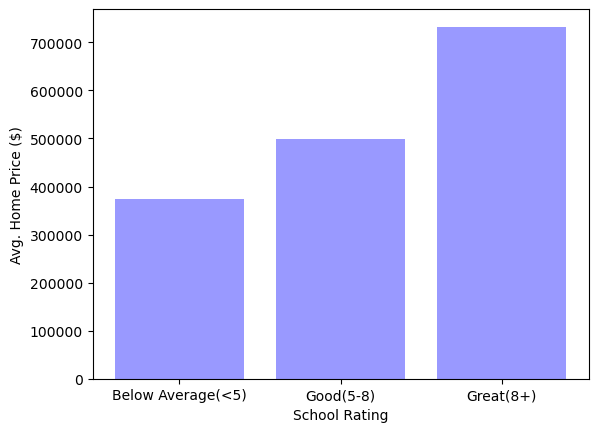

In [105]:
bar2021 = plt.bar(group_names, mean_vals, color="b",alpha=.4, align="center")
plt.xlabel("School Rating")
plt.ylabel("Avg. Home Price ($)")
plt.show()

In [108]:
sorted_by_price = summaryDf.sort_values(by="2021 Avg. Home Value", ascending=False)
sorted_by_price

,School Rating,2019 Avg. Home Value,2020 Avg. Home Value,2021 Avg. Home Value,Low Income %,Rating
Zip Code,,,,,,
07723,6.000000,1.870399e+06,2.014282e+06,2.675285e+06,6.00,Good(5-8)
07620,9.000000,2.172472e+06,2.078202e+06,2.427716e+06,0.02,Great(8+)
08202,10.000000,1.448033e+06,1.586109e+06,2.144990e+06,0.04,Great(8+)
08247,10.000000,1.306273e+06,1.427352e+06,1.970783e+06,0.03,Great(8+)
07976,7.000000,1.421632e+06,1.406838e+06,1.656800e+06,7.00,Good(5-8)
...,...,...,...,...,...,...
08069,5.000000,1.114846e+05,1.245390e+05,1.540730e+05,12.00,Below Average(<5)
08079,7.666667,1.043657e+05,1.204287e+05,1.529747e+05,5.74,Good(5-8)
08401,6.333333,1.104201e+05,1.216525e+05,1.496458e+05,11.00,Good(5-8)


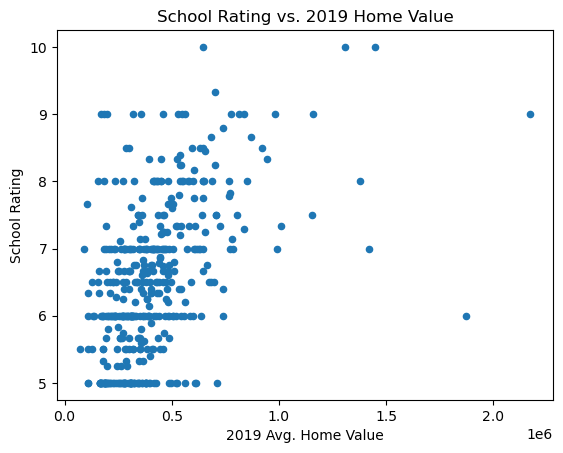

In [112]:
plot = summaryDf.plot(kind="scatter", x="2019 Avg. Home Value", y="School Rating")

plt.title("School Rating vs. 2019 Home Value")

plt.show()

The r-value is: 0.23909506836560362
y = 2.4017885346822195e-06x + 5.53


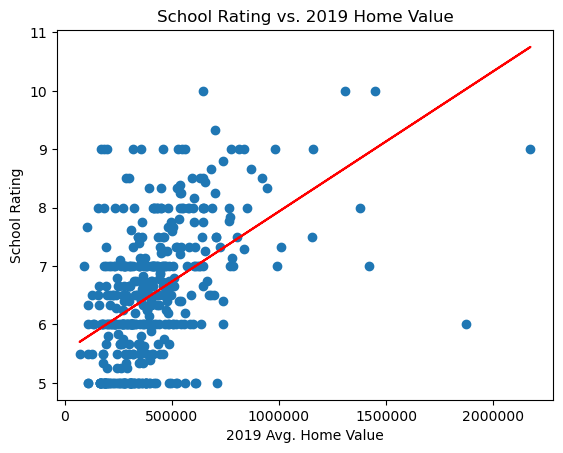

In [47]:
# Define x and y values
x_values = summaryDf['2019 Avg. Home Value']
y_values = summaryDf['School Rating']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Find y = mx + b
line_eq = "y = " + str(slope) + "x + " + str(round(intercept, 2))

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.title("School Rating vs. 2019 Home Value")
plt.xlabel("2019 Avg. Home Value")
plt.ylabel("School Rating")
plt.ticklabel_format(style='plain') 

print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

## 2020 School Rating and Home Values

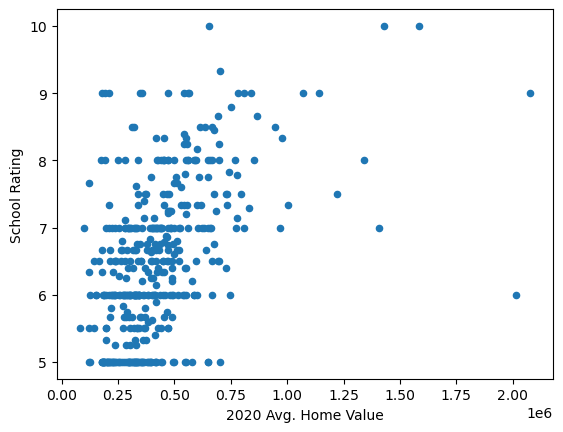

In [39]:
plot2020 = summaryDf.plot(kind="scatter", x="2020 Avg. Home Value", y="School Rating")

The r-value is: 0.23406196702241774
y = 2.376311593062289e-06x + 5.5


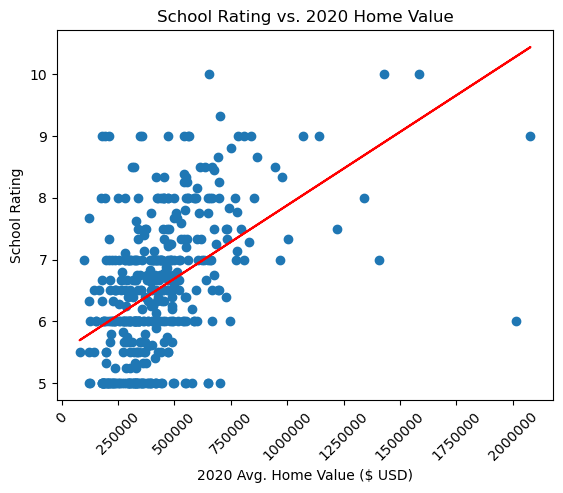

In [50]:
# 2020 has some missing values - drop those for continuity
missing_2020_df = summaryDf.dropna(subset=['2020 Avg. Home Value', 'School Rating'])

# Define x and y values
x_values = missing_2020_df['2020 Avg. Home Value']
y_values = missing_2020_df['School Rating']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Find y = mx + b
line_eq = "y = " + str(slope) + "x + " + str(round(intercept, 2)) 

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.title("School Rating vs. 2020 Home Value")
plt.xlabel("2020 Avg. Home Value ($ USD)")
plt.ylabel("School Rating")
plt.ticklabel_format(style='plain') 
plt.xticks(rotation=45)

print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

## 2021 School Rating and Home Values

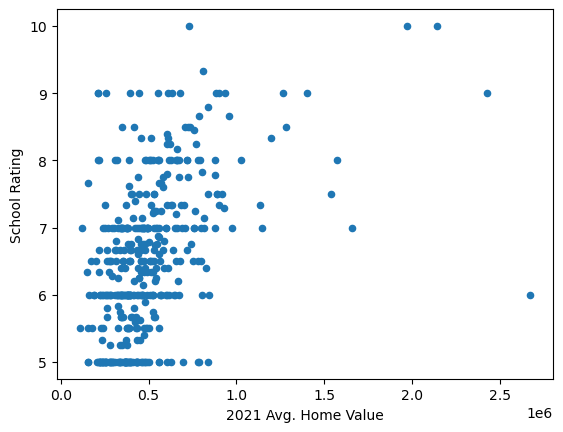

In [42]:
plot2021 = summaryDf.plot(kind="scatter", x="2021 Avg. Home Value", y="School Rating")

The r-value is: 0.21685137085196282
y = 1.8819558254808306e-06x + 5.58


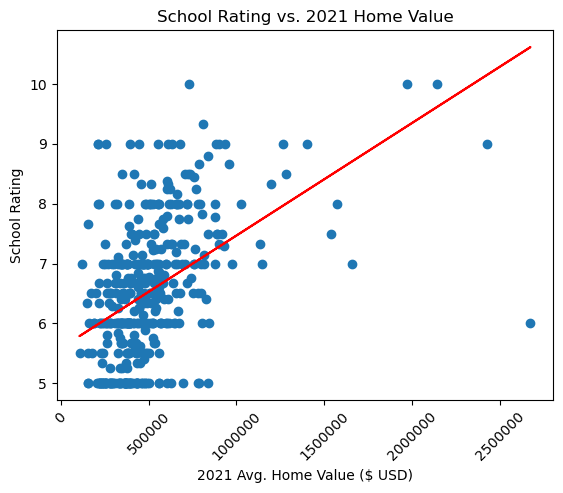

In [48]:
# Define x and y values
x_values = summaryDf['2021 Avg. Home Value']
y_values = summaryDf['School Rating']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Find y = mx + b
line_eq = "y = " + str(slope) + "x + " + str(round(intercept, 2)) 

# Create plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.title("School Rating vs. 2021 Home Value")
plt.xlabel("2021 Avg. Home Value ($ USD)")
plt.ylabel("School Rating")
plt.ticklabel_format(style='plain') 
plt.xticks(rotation=45)

print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

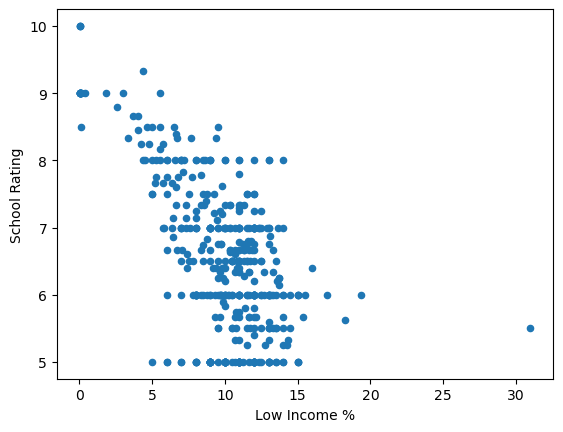

In [43]:
lowincplot = plot2021 = summaryDf.plot(kind="scatter", x="Low Income %", y="School Rating")

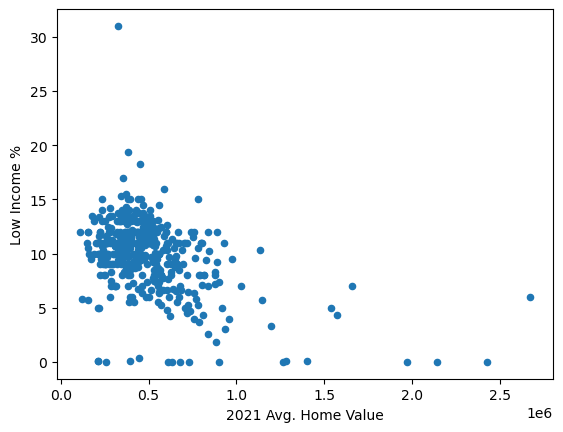

In [44]:
lowincplot = plot2021 = summaryDf.plot(kind="scatter", x="2021 Avg. Home Value", y="Low Income %")